In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print('The shape of the training inputs:', X_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',X_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (60000, 28, 28)
The shape of the training labels: (60000,)
The shape of the testing inputs: (10000, 28, 28)
The shape of the testing labels: (10000,)


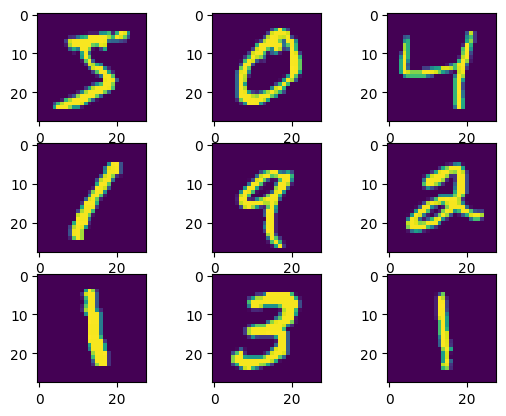

In [4]:
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt])
         cnt += 1

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [7]:
y_train[0]

5

In [8]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [9]:
model = tf.keras.models.Sequential()

In [10]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [12]:
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))

In [13]:
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 4s 3ms/step - loss: 0.3469 - accuracy: 0.9034
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.1399 - accuracy: 0.9586
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0983 - accuracy: 0.9700
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0729 - accuracy: 0.9780
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.0572 - accuracy: 0.9826


In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.9733
0.08540832996368408
0.9732999801635742


In [18]:
prediction = model.predict([X_test])
prediction

313/313 [==============================] - 1s 2ms/step


array([[1.33391986e-09, 1.44286512e-08, 6.88715261e-07, ...,
        9.99971867e-01, 1.22899646e-08, 6.53950622e-07],
       [1.28871767e-08, 7.18582468e-03, 9.92764175e-01, ...,
        1.91845473e-09, 4.78289124e-08, 2.88790363e-11],
       [1.52410593e-07, 9.99816954e-01, 2.61400746e-05, ...,
        5.66640920e-05, 5.79304433e-05, 2.03898523e-07],
       ...,
       [2.57414312e-09, 7.93272079e-08, 5.26432897e-09, ...,
        5.76860793e-06, 1.77833874e-06, 7.53157656e-05],
       [1.12447005e-07, 5.15072600e-07, 4.70039652e-09, ...,
        6.82915591e-09, 3.95424504e-05, 7.82151588e-09],
       [3.14652266e-06, 3.16948352e-08, 1.17773851e-07, ...,
        2.56965109e-11, 2.35743638e-08, 8.90328034e-10]], dtype=float32)

In [19]:
print('Probabilities: ', prediction[10])
print('\n')
print('Prediction: ', np.argmax(prediction[10]))

Probabilities:  [9.99721825e-01 6.07426500e-06 1.92405932e-04 2.35123110e-07
 1.07163736e-07 4.83243020e-05 4.11231576e-06 1.04745936e-06
 7.73760803e-07 2.50931607e-05]


Prediction:  0


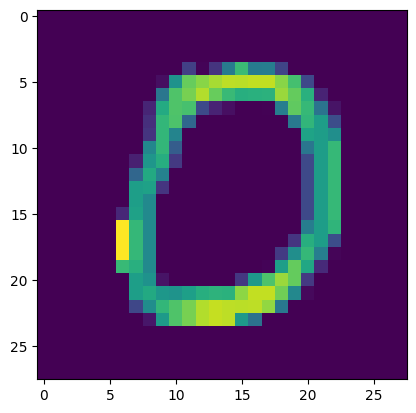

In [20]:
plt.imshow(X_test[10])
plt.show()